# Supply Chain Mangement Software:


In [35]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import plotly.graph_objs as go
import plotly.offline as py
py.init_notebook_mode(connected=True)

In [36]:
df = pd.read_csv('supply_chain.csv',encoding = 'ANSI')

In [37]:
df

,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,...,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
0,1,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,...,30,19,551.00,29.00,0.97,Ranbaxy Fine Chemicals LTD,Yes,13,780.34,NaN
1,3,108-VN-T01,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,...,240,1000,6200.00,6.20,0.03,"Aurobindo Unit III, India",Yes,358,4521.5,NaN
2,4,100-CI-T01,Pre-PQ Process,SCMS-20,ASN-14,Côte d'Ivoire,PMO - US,Direct Drop,FCA,Air,...,100,500,40000.00,80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,Yes,171,1653.78,NaN
3,15,108-VN-T01,Pre-PQ Process,SCMS-78,ASN-50,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,31920,127360.80,3.99,0.07,"Ranbaxy, Paonta Shahib, India",Yes,1855,16007.06,NaN
4,16,108-VN-T01,Pre-PQ Process,SCMS-81,ASN-55,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,38000,121600.00,3.20,0.05,"Aurobindo Unit III, India",Yes,7590,45450.08,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10319,86818,103-ZW-T30,FPQ-15197,SO-50020,DN-4307,Zimbabwe,PMO - US,From RDC,N/A - From RDC,Truck,...,60,166571,599655.60,3.60,0.06,"Mylan, H-12 & H-13, India",No,See DN-4307 (ID#:83920),See DN-4307 (ID#:83920),705.79
10320,86819,104-CI-T30,FPQ-15259,SO-50102,DN-4313,Côte d'Ivoire,PMO - US,From RDC,N/A - From RDC,Truck,...,60,21072,137389.44,6.52,0.11,Hetero Unit III Hyderabad IN,No,See DN-4313 (ID#:83921),See DN-4313 (ID#:83921),161.71
10321,86821,110-ZM-T30,FPQ-14784,SO-49600,DN-4316,Zambia,PMO - US,From RDC,N/A - From RDC,Truck,...,30,514526,5140114.74,9.99,0.33,Cipla Ltd A-42 MIDC Mahar. IN,No,Weight Captured Separately,Freight Included in Commodity Cost,5284.04
10322,86822,200-ZW-T30,FPQ-16523,SO-51680,DN-4334,Zimbabwe,PMO - US,From RDC,N/A - From RDC,Truck,...,60,17465,113871.80,6.52,0.11,Mylan (formerly Matrix) Nashik,Yes,1392,Freight Included in Commodity Cost,134.03


In [38]:
df.shape

(10324, 33)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10324 entries, 0 to 10323
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            10324 non-null  int64  
 1   Project Code                  10324 non-null  object 
 2   PQ #                          10324 non-null  object 
 3   PO / SO #                     10324 non-null  object 
 4   ASN/DN #                      10324 non-null  object 
 5   Country                       10324 non-null  object 
 6   Managed By                    10324 non-null  object 
 7   Fulfill Via                   10324 non-null  object 
 8   Vendor INCO Term              10324 non-null  object 
 9   Shipment Mode                 9964 non-null   object 
 10  PQ First Sent to Client Date  10324 non-null  object 
 11  PO Sent to Vendor Date        10324 non-null  object 
 12  Scheduled Delivery Date       10324 non-null  object 
 13  D

# Cleaning


In [40]:
df.dtypes

ID                                int64
Project Code                     object
PQ #                             object
PO / SO #                        object
ASN/DN #                         object
Country                          object
Managed By                       object
Fulfill Via                      object
Vendor INCO Term                 object
Shipment Mode                    object
PQ First Sent to Client Date     object
PO Sent to Vendor Date           object
Scheduled Delivery Date          object
Delivered to Client Date         object
Delivery Recorded Date           object
Product Group                    object
Sub Classification               object
Vendor                           object
Item Description                 object
Molecule/Test Type               object
Brand                            object
Dosage                           object
Dosage Form                      object
Unit of Measure (Per Pack)        int64
Line Item Quantity                int64


In [41]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,10324.0,51098.968229,31944.332496,1.0,12795.7500,57540.500,83648.2500,86823.00
Unit of Measure (Per Pack),10324.0,77.990895,76.579764,1.0,30.0000,60.000,90.0000,1000.00
Line Item Quantity,10324.0,18332.534870,40035.302961,1.0,408.0000,3000.000,17039.7500,619999.00
Line Item Value,10324.0,157650.567347,345292.066979,0.0,4314.5925,30471.465,166447.1400,5951990.40
Pack Price,10324.0,21.910241,45.609223,0.0,4.1200,9.300,23.5925,1345.64
Unit Price,10324.0,0.611701,3.275808,0.0,0.0800,0.160,0.4700,238.65
Line Item Insurance (USD),10037.0,240.117626,500.190568,0.0,6.5100,47.040,252.4000,7708.44


In [42]:

df["Shipment Mode"].value_counts()

Air            6113
Truck          2830
Air Charter     650
Ocean           371
Name: Shipment Mode, dtype: int64

In [43]:
df["Shipment Mode"].unique()

array(['Air', nan, 'Truck', 'Air Charter', 'Ocean'], dtype=object)

# Data Cleaning

In [44]:
def clean_data(df):
    df = df.copy()
    
    # Drop ID column
    df = df.drop('ID', axis=1)
    
    # Drop missing target rows
    missing_target_rows = df[df['Shipment Mode'].isna()].index
    df = df.drop(missing_target_rows, axis=0).reset_index(drop=True)
    
    # Fill missing values
    df['Dosage'] = df['Dosage'].fillna(df['Dosage'].mode()[0])
    df['Line Item Insurance (USD)'] = df['Line Item Insurance (USD)'].fillna(df['Line Item Insurance (USD)'].mean())
    
    # Drop date columns with too many missing values
    df = df.drop(['PQ First Sent to Client Date', 'PO Sent to Vendor Date'], axis=1)
    
    # Extract date features
    for column in ['Scheduled Delivery Date', 'Delivered to Client Date', 'Delivery Recorded Date']:
        df[column] = pd.to_datetime(df[column])
        df[column + ' Year'] = df[column].apply(lambda x: x.year)
        df[column + ' Month'] = df[column].apply(lambda x: x.month)
        df[column + ' Day'] = df[column].apply(lambda x: x.day)
        df = df.drop(column, axis=1)
    
    # Drop numeric columns with too many missing values
    df = df.drop(['Weight (Kilograms)', 'Freight Cost (USD)'], axis=1)
    
    # Drop high-cardinality columns
    df = df.drop(['PQ #', 'PO / SO #', 'ASN/DN #'], axis=1)
    
    # Binary encoding
    df['Fulfill Via'] = df['Fulfill Via'].replace({'Direct Drop': 0, 'From RDC': 1})
    df['First Line Designation'] = df['First Line Designation'].replace({'No': 0, 'Yes': 1})
    
    return df


In [45]:
x = clean_data(df)

In [46]:
x

,Project Code,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,Product Group,Sub Classification,Vendor,Item Description,...,Line Item Insurance (USD),Scheduled Delivery Date Year,Scheduled Delivery Date Month,Scheduled Delivery Date Day,Delivered to Client Date Year,Delivered to Client Date Month,Delivered to Client Date Day,Delivery Recorded Date Year,Delivery Recorded Date Month,Delivery Recorded Date Day
0,100-CI-T01,Côte d'Ivoire,PMO - US,0,EXW,Air,HRDT,HIV test,RANBAXY Fine Chemicals LTD.,"HIV, Reveal G3 Rapid HIV-1 Antibody Test, 30 T...",...,241.243885,2006,6,2,2006,6,2,2006,6,2
1,108-VN-T01,Vietnam,PMO - US,0,EXW,Air,ARV,Pediatric,Aurobindo Pharma Limited,"Nevirapine 10mg/ml, oral suspension, Bottle, 2...",...,241.243885,2006,11,14,2006,11,14,2006,11,14
2,100-CI-T01,Côte d'Ivoire,PMO - US,0,FCA,Air,HRDT,HIV test,Abbott GmbH & Co. KG,"HIV 1/2, Determine Complete HIV Kit, 100 Tests",...,241.243885,2006,8,27,2006,8,27,2006,8,27
3,108-VN-T01,Vietnam,PMO - US,0,EXW,Air,ARV,Adult,SUN PHARMACEUTICAL INDUSTRIES LTD (RANBAXY LAB...,"Lamivudine 150mg, tablets, 60 Tabs",...,241.243885,2006,9,1,2006,9,1,2006,9,1
4,108-VN-T01,Vietnam,PMO - US,0,EXW,Air,ARV,Adult,Aurobindo Pharma Limited,"Stavudine 30mg, capsules, 60 Caps",...,241.243885,2006,8,11,2006,8,11,2006,8,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9959,103-ZW-T30,Zimbabwe,PMO - US,1,N/A - From RDC,Truck,ARV,Pediatric,SCMS from RDC,"Lamivudine/Nevirapine/Zidovudine 30/50/60mg, d...",...,705.790000,2015,7,31,2015,7,15,2015,7,20
9960,104-CI-T30,Côte d'Ivoire,PMO - US,1,N/A - From RDC,Truck,ARV,Adult,SCMS from RDC,"Lamivudine/Zidovudine 150/300mg, tablets, 60 Tabs",...,161.710000,2015,7,31,2015,8,6,2015,8,7
9961,110-ZM-T30,Zambia,PMO - US,1,N/A - From RDC,Truck,ARV,Adult,SCMS from RDC,Efavirenz/Lamivudine/Tenofovir Disoproxil Fuma...,...,5284.040000,2015,8,31,2015,8,25,2015,9,3
9962,200-ZW-T30,Zimbabwe,PMO - US,1,N/A - From RDC,Truck,ARV,Adult,SCMS from RDC,"Lamivudine/Zidovudine 150/300mg, tablets, 60 Tabs",...,134.030000,2015,9,9,2015,8,4,2015,8,11


In [47]:
x.to_csv('clean_data.csv')

### Data Visualisation:

In [48]:
df.shape

(10324, 33)

In [49]:
df["Shipment Mode"].isnull()

0        False
1        False
2        False
3        False
4        False
         ...  
10319    False
10320    False
10321    False
10322    False
10323    False
Name: Shipment Mode, Length: 10324, dtype: bool

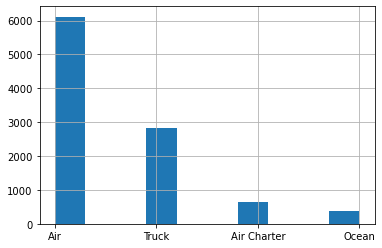

In [50]:
df["Shipment Mode"].hist();

### Freight Cost:

<Figure size 1080x864 with 0 Axes>

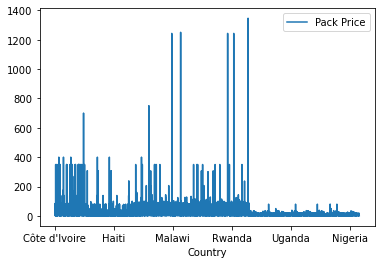

In [51]:
# freigth cost = It is the amount paid to a carrier company for the transportation of goods from the point of origin to an agreed location.
plt.figure(figsize=(15, 12))
df.plot(x='Country', y='Pack Price');

In [52]:
pd.crosstab(df["Country"], df["Shipment Mode"]).transpose()

Country,Afghanistan,Angola,Belize,Benin,Botswana,Burkina Faso,Burundi,Cameroon,"Congo, DRC",Côte d'Ivoire,...,South Africa,South Sudan,Sudan,Swaziland,Tanzania,Togo,Uganda,Vietnam,Zambia,Zimbabwe
Shipment Mode,,,,,,,,,,,,,,,,,,,,,
Air,3,5,1,13,63,2,98,61,331,682,...,230,162,46,32,306,3,534,687,195,145
Air Charter,0,0,0,0,0,0,0,14,0,5,...,0,0,0,0,0,0,0,0,0,18
Ocean,0,0,0,0,0,0,0,0,0,5,...,229,0,0,2,6,0,8,0,3,3
Truck,0,2,0,0,4,0,0,0,2,278,...,905,2,0,1,187,0,229,1,386,360


In [53]:
df.corr()

,ID,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Line Item Insurance (USD)
ID,1.000000,-0.083356,0.192006,0.136335,-0.168745,-0.073268,0.103557
Unit of Measure (Per Pack),-0.083356,1.000000,-0.151020,-0.128666,0.097182,-0.102806,-0.131825
Line Item Quantity,0.192006,-0.151020,1.000000,0.839081,-0.133651,-0.052227,0.798662
Line Item Value,0.136335,-0.128666,0.839081,1.000000,-0.018809,-0.019583,0.961353
Pack Price,-0.168745,0.097182,-0.133651,-0.018809,1.000000,0.250043,-0.015398
Unit Price,-0.073268,-0.102806,-0.052227,-0.019583,0.250043,1.000000,-0.021433
Line Item Insurance (USD),0.103557,-0.131825,0.798662,0.961353,-0.015398,-0.021433,1.000000


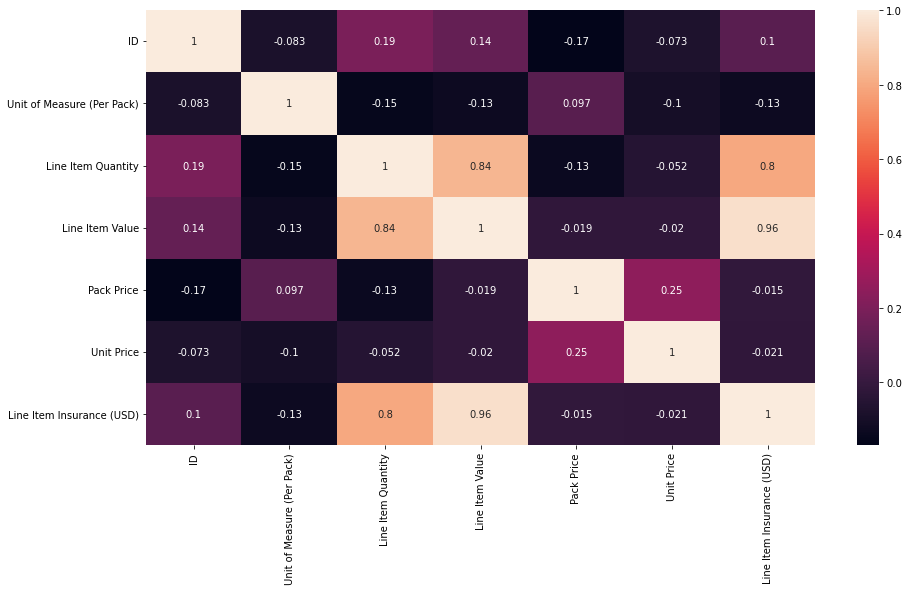

In [54]:
plt.figure(figsize=(15, 8))
sns.heatmap(df.corr(), annot=True);

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 0, 'Country Name')

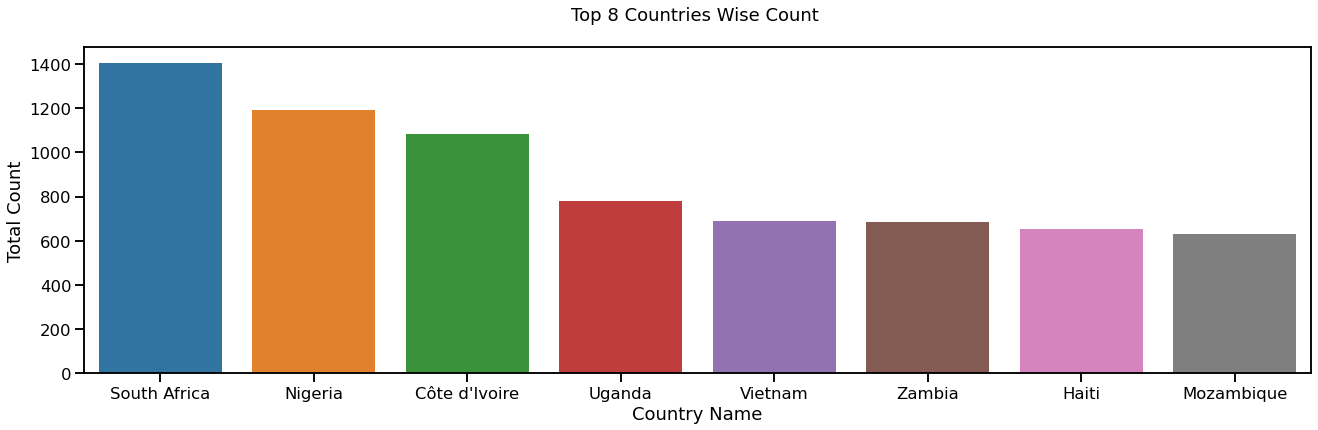

In [55]:
DataSet = df.copy()
ItemCount = DataSet["Country"].value_counts().nlargest(8)
sns.set_context("talk",font_scale=1)
plt.figure(figsize=(22,6))
sns.countplot(DataSet['Country'],order = DataSet['Country'].value_counts().nlargest(8).index);
plt.title('Top 8 Countries Wise Count \n')
plt.ylabel('Total Count')
plt.xlabel('Country Name')

Text(0.5, 0, 'Country Name')

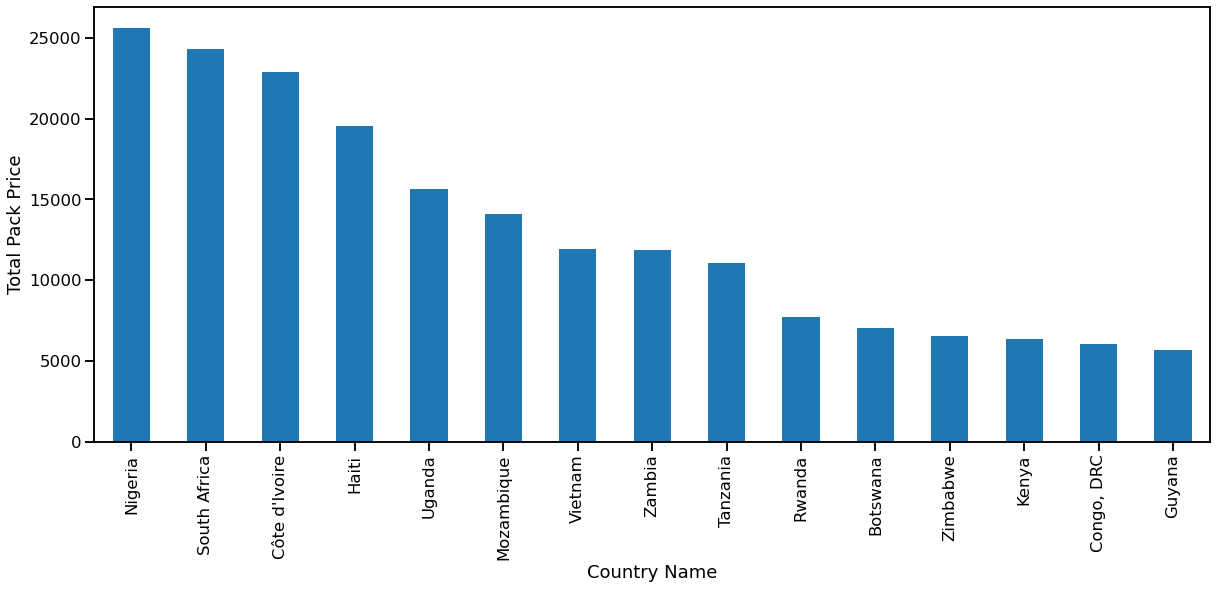

In [56]:
TotalPrice = DataSet.groupby(['Country'])['Pack Price'].sum().nlargest(15)
plt.figure(figsize=(20,8))
GraphData=DataSet.groupby(['Country'])['Pack Price'].sum().nlargest(15)
GraphData.plot(kind='bar');
plt.ylabel('Total Pack Price')
plt.xlabel('Country Name')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 0, 'First Line Designation')

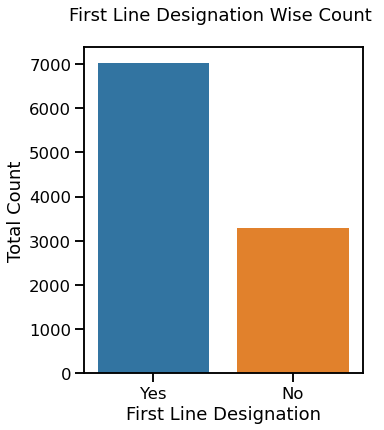

In [57]:
plt.figure(figsize=(5,6))
sns.countplot(DataSet['First Line Designation'],order = DataSet['First Line Designation'].value_counts().nlargest(10).index)
plt.title('First Line Designation Wise Count \n')
plt.ylabel('Total Count')
plt.xlabel('First Line Designation')

In [58]:
ShippingMode = DataSet["Shipment Mode"].value_counts()
labels = (np.array(ShippingMode.index))
sizes = (np.array((ShippingMode / ShippingMode.sum())*100))

trace = go.Pie(labels=labels, values=sizes)
layout = go.Layout(title="Shipment Mode")
dat = [trace]
fig = go.Figure(data=dat, layout=layout)
py.iplot(fig, filename="Shipment Mode")

Manufacturing Site
Aurobindo Unit III, India         3172
Mylan (formerly Matrix) Nashik    1415
Hetero Unit III Hyderabad IN       869
Cipla, Goa, India                  665
Strides, Bangalore, India.         540
Alere Medical Co., Ltd.            481
Trinity Biotech, Plc               405
ABBVIE Ludwigshafen Germany        366
Inverness Japan                    345
ABBVIE (Abbott) Logis. UK          219
dtype: int64


Text(0.5, 0, 'Manufacturing Site Name')

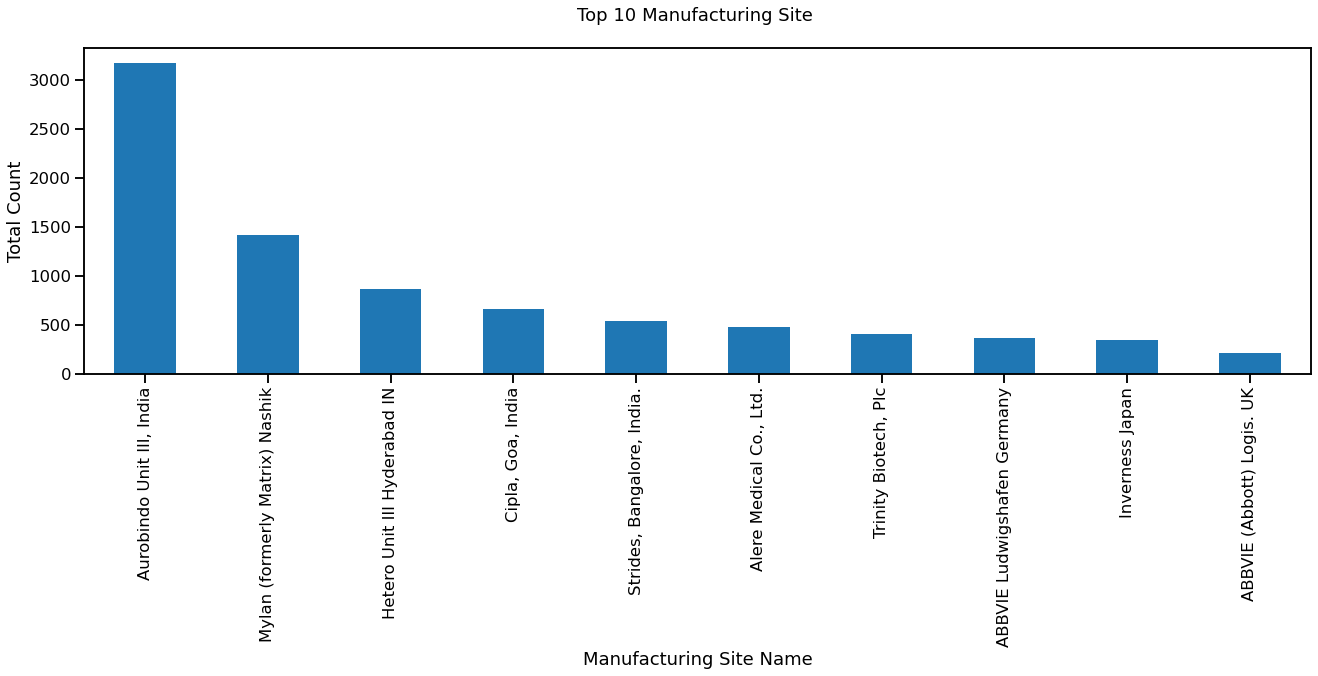

In [59]:
plt.figure(figsize=(22,6))
TopFiveManufacturingSite=DataSet.groupby('Manufacturing Site').size().nlargest(10)
print(TopFiveManufacturingSite)
TopFiveManufacturingSite.plot(kind='bar')
plt.title('Top 10 Manufacturing Site \n')
plt.ylabel('Total Count')
plt.xlabel('Manufacturing Site Name')

Top 10 Ocean Manufacturing Site 

Aurobindo Unit III, India                                                   177
Cipla, Goa, India                                                            49
Mylan (formerly Matrix) Nashik                                               44
Hetero Unit III Hyderabad IN                                                 29
Strides, Bangalore, India.                                                   27
GSK Mississauga (Canada)                                                      9
Aurobindo Unit VII, IN                                                        7
ABBVIE Ludwigshafen Germany                                                   5
Micro labs, Verna, Goa, India                                                 5
Emcure Plot No.P-2, I.T-B.T. Park, Phase II, MIDC, Hinjwadi, Pune, India      5
Name: Manufacturing Site, dtype: int64


Text(0.5, 0, 'Manufacturing Site')

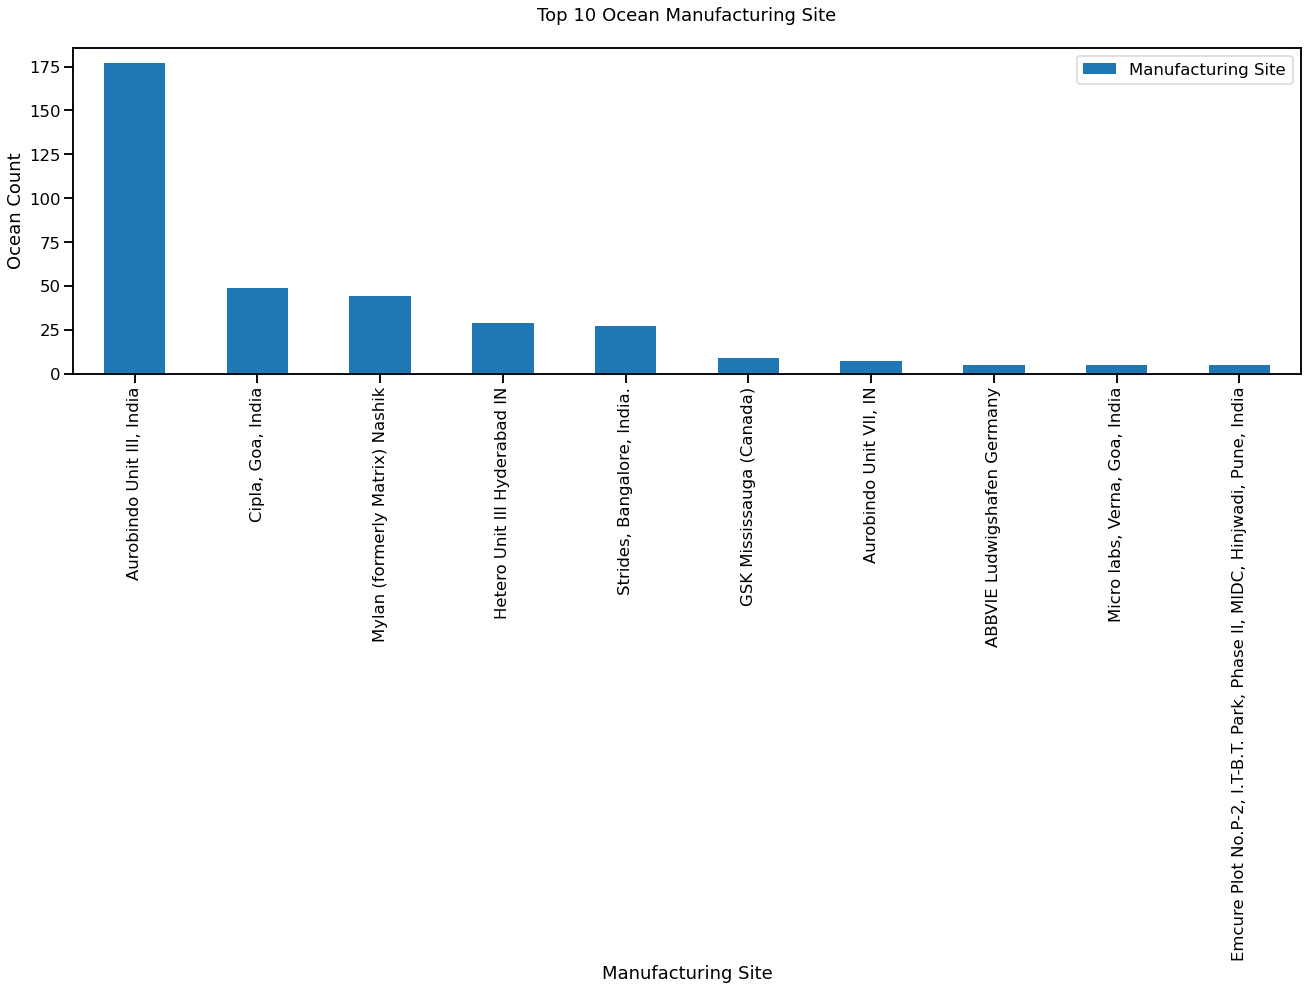

In [60]:
ItemData=DataSet[DataSet['Shipment Mode']=='Ocean']
DataSet[DataSet["Shipment Mode"]=='Ocean']['Manufacturing Site'].value_counts()[0:10].to_frame().plot.bar(figsize=(22,6))
ItemSupplier = DataSet[DataSet["Shipment Mode"]=='Ocean']['Manufacturing Site'].value_counts()[0:10]
print("Top 10 Ocean Manufacturing Site \n")
print(ItemSupplier)
plt.title('Top 10 Ocean Manufacturing Site\n')
plt.ylabel('Ocean Count')
plt.xlabel('Manufacturing Site')